In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
import os

In [5]:
data_path = r"C:\Users\LENOVO\OneDrive\Desktop\pnemo\x_ray_dataset\chest_xray\chest_xray"
print(os.listdir(data_path))


['.DS_Store', 'test', 'train', 'val']


In [6]:

pneumonia_path = r"C:\Users\LENOVO\OneDrive\Desktop\pnemo\x_ray_dataset\chest_xray\chest_xray\train\PNEUMONIA"

# Count number of files in the folder
print(len(os.listdir(pneumonia_path)))


3876


In [7]:
train_dir = r"x_ray_dataset\chest_xray\chest_xray\train"
test_dir = r"x_ray_dataset\chest_xray\chest_xray\test"
val_dir = r"x_ray_dataset\chest_xray\chest_xray\val"


Data Visualization

In [8]:
import matplotlib.pyplot as plt

In [9]:
print("Current Working Directory:", os.getcwd())


Current Working Directory: c:\Users\LENOVO\OneDrive\Desktop\pnemo


In [10]:
print("Train Path:", os.path.abspath(train_dir))
print("Exists?", os.path.exists(train_dir))


Train Path: c:\Users\LENOVO\OneDrive\Desktop\pnemo\x_ray_dataset\chest_xray\chest_xray\train
Exists? True


In [11]:
print("Test Path:", os.path.abspath(test_dir))
print("Exists?", os.path.exists(test_dir))


Test Path: c:\Users\LENOVO\OneDrive\Desktop\pnemo\x_ray_dataset\chest_xray\chest_xray\test
Exists? True


In [12]:
print("val Path:", os.path.abspath(val_dir))
print("Exists?", os.path.exists(val_dir))


val Path: c:\Users\LENOVO\OneDrive\Desktop\pnemo\x_ray_dataset\chest_xray\chest_xray\val
Exists? True


Train set:

PNEUMONIA = 3876
NORMAL = 1342

Test set:

PNEUMONIA = 390
NORMAL = 234

Validation set:

PNEUMONIA = 9
NORMAL = 9


First 9 pneumonia X-ray images from train set:



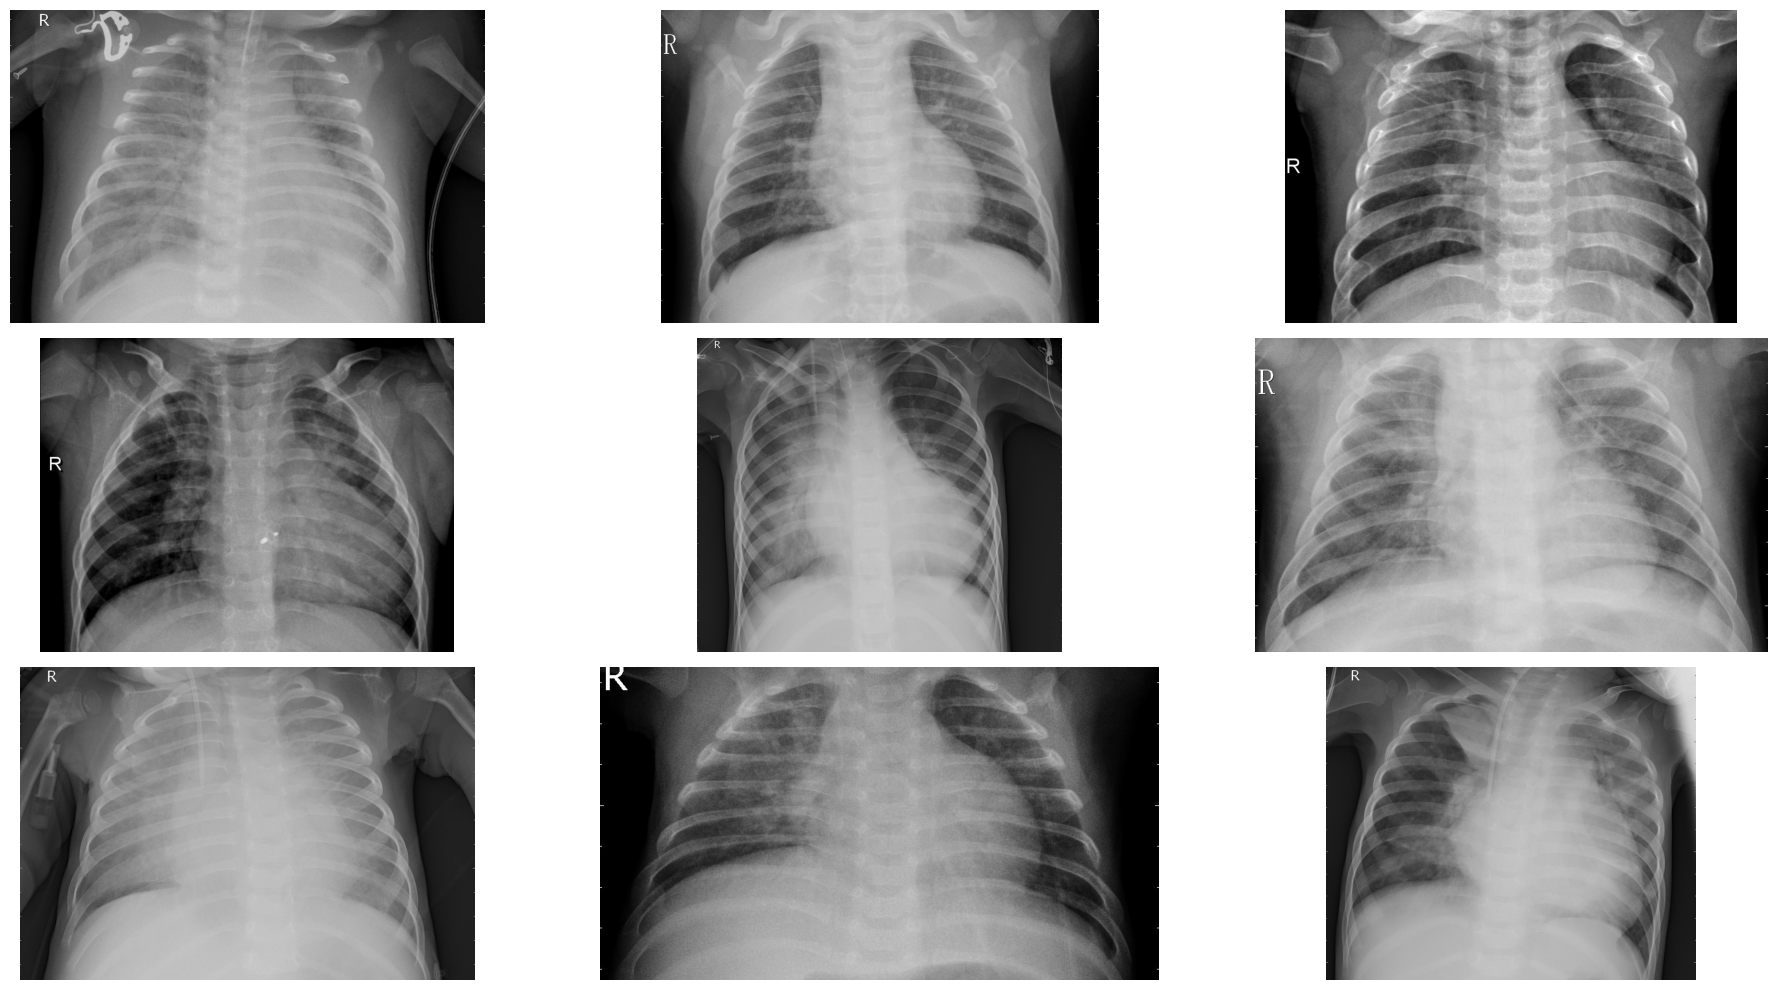

In [13]:
print("Train set:\n")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA = {num_pneumonia}")
print(f"NORMAL = {num_normal}")

print("\n=================================================")

print("Test set:\n")
print(f"PNEUMONIA = {len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL = {len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("\n=================================================")

print("Validation set:\n")
print(f"PNEUMONIA = {len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL = {len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

print("\n=================================================")

# ✅ Visualize first 9 pneumonia X-ray images from train set
print("\nFirst 9 pneumonia X-ray images from train set:\n")
pneumonia_dir = os.path.join("x_ray_dataset/chest_xray/train", "PNEUMONIA")
pneumonia_images = os.listdir(pneumonia_dir)

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img_path = os.path.join(pneumonia_dir, pneumonia_images[i])
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


Normal X-ray images from train set:



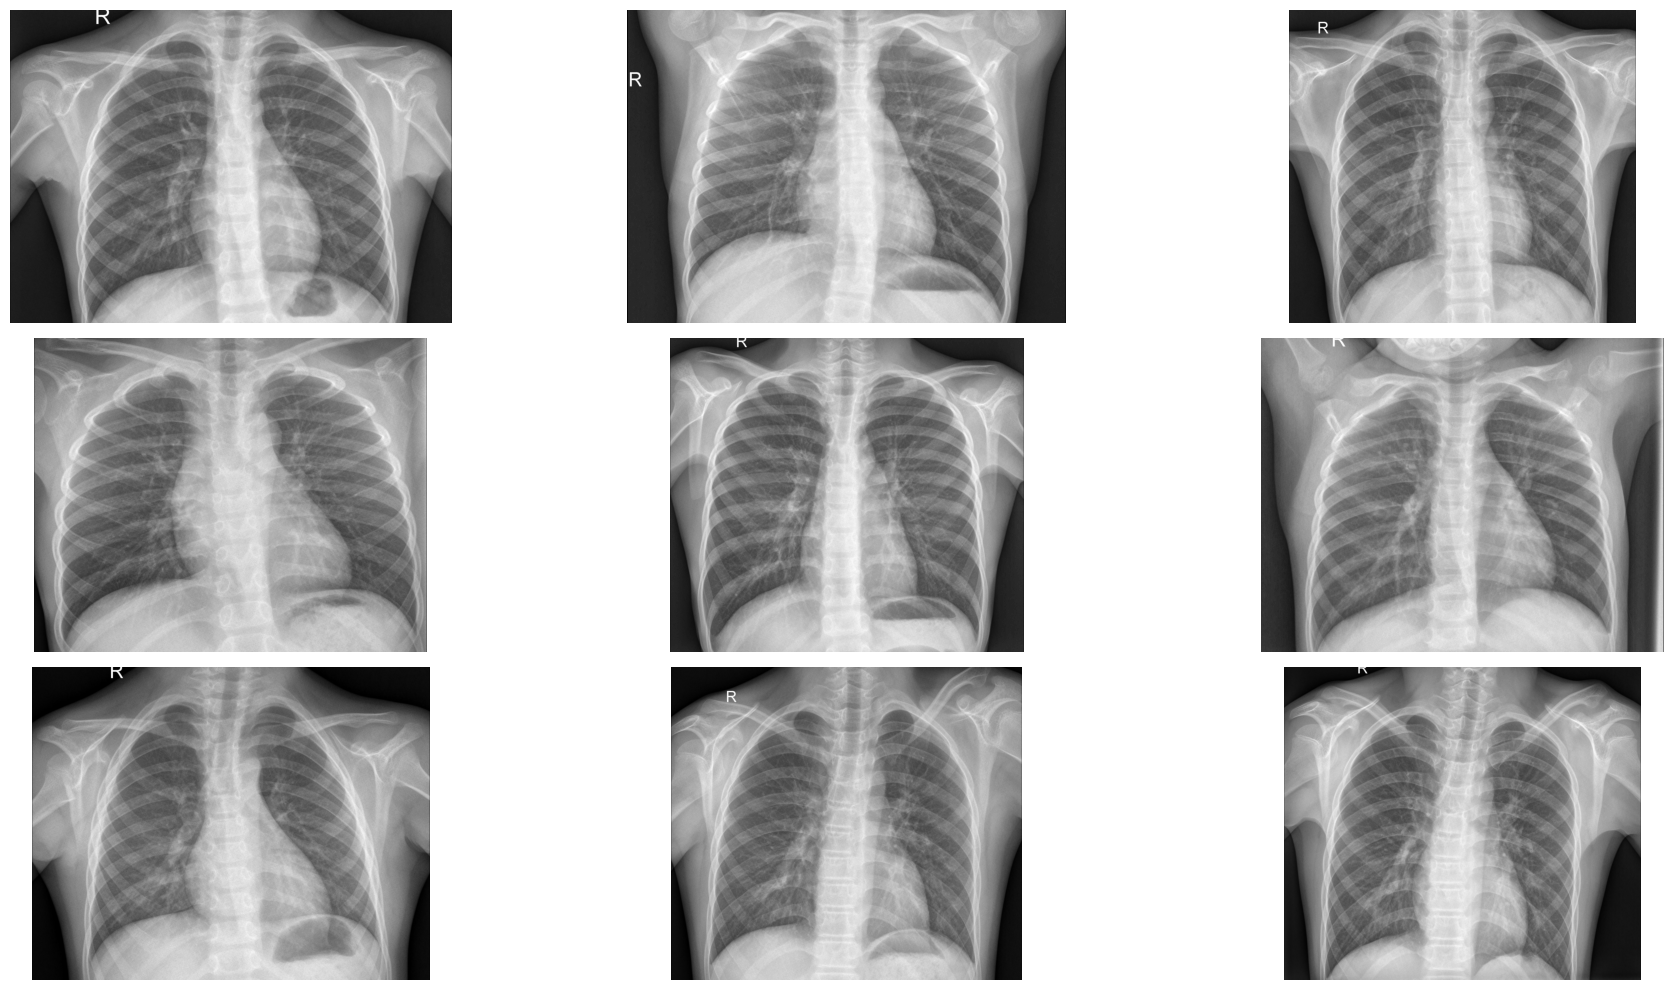

In [14]:
print("\nNormal X-ray images from train set:\n")
normal = os.listdir("x_ray_dataset/chest_xray/test/NORMAL")
normal_dir = "x_ray_dataset/chest_xray/test/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 1317 pixels width and 1857 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 130.9986 and the standard deviation is 57.1020


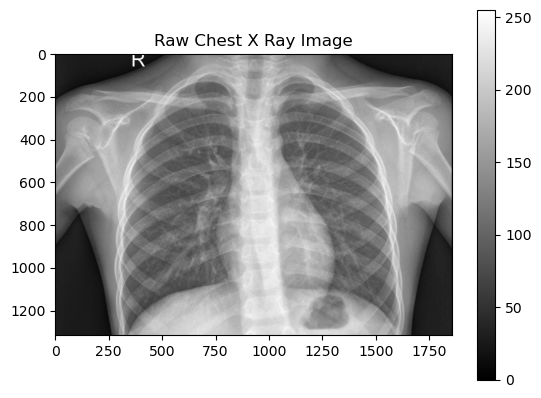

In [15]:
normal_img = os.listdir("x_ray_dataset/chest_xray/test/NORMAL")[0]
normal_dir = "x_ray_dataset/chest_xray/test/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

Investigating pixel value distribution

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24996\2497118673.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_img.ravel(),


Text(0, 0.5, '# Pixels in Image')

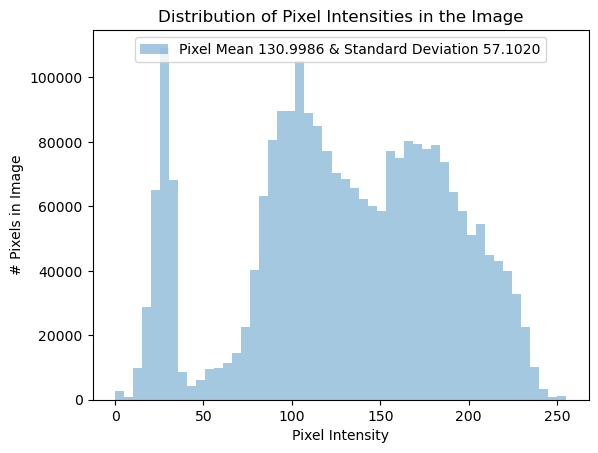

In [16]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

Image Preprocessing

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

Build a separate generator fo valid and test sets

In [19]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.2114124..2.432369].


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 2.6833 and the minimum is -3.4979
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


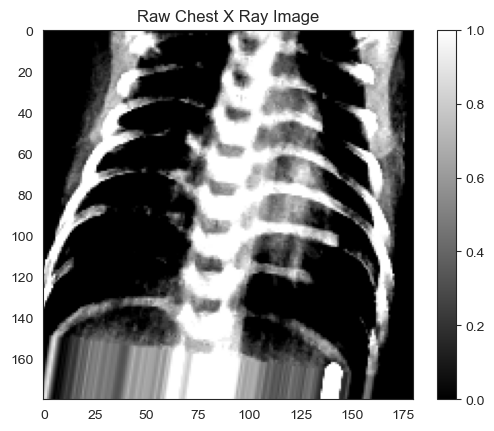

In [20]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24996\1221570370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image.ravel(),


Text(0, 0.5, '# Pixels in Image')

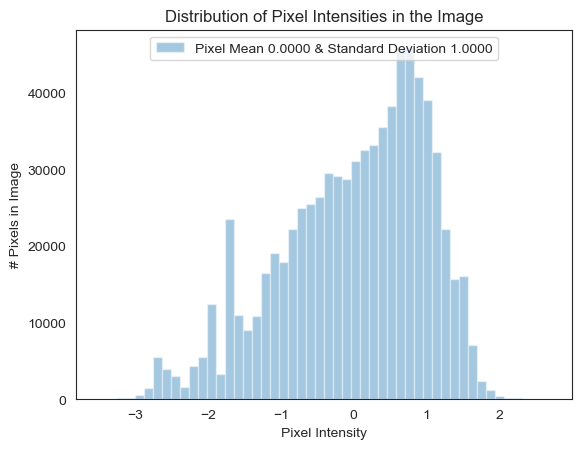

In [21]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

Building a CNN model

In [22]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense


In [26]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
print("Model layer added successfully!")


TensorFlow version: 2.19.0


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model layer added successfully!


In [27]:
model = Sequential()

In [28]:
# First Conv layer with input_shape only here
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(BatchNormalization())

In [29]:
# Remove input_shape here (already specified in first layer)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

In [30]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

In [33]:
from keras.layers import Dropout


In [34]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


In [35]:

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 176, 176, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 176, 176, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 88, 88, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 86, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 86, 86, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 84, 84, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 84, 84, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 40, 40, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 38, 38, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 38, 38, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46208)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,914,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,220,193 (23.73 MB)

 Trainable params: 6,219,297 (23.72 MB)

 Non-trainable params: 896 (3.50 KB)

None


In [36]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 86s 758ms/step - accuracy: 0.6741 - loss: 1.7445 - val_accuracy: 0.5000 - val_loss: 44.7736
Epoch 2/10


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 722ms/step - accuracy: 0.8118 - loss: 0.4605 - val_accuracy: 0.5000 - val_loss: 7.1011
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 740ms/step - accuracy: 0.8358 - loss: 0.4194 - val_accuracy: 0.5000 - val_loss: 19.8265
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 728ms/step - accuracy: 0.8840 - loss: 0.1914 - val_accuracy: 0.5000 - val_loss: 1.4302
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 735ms/step - accuracy: 0.8728 - loss: 0.1579 - val_accuracy: 0.6250 - val_loss: 1.1435
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 735ms/step - accuracy: 0.8693 - loss: 0.1417 - val_accuracy: 0.4375 - val_loss: 2.9676
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 380ms/step - accuracy: 0.9220 - loss: 0.0950 - val_accuracy: 0.5000 - val_loss: 2.2464
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 728ms/step - accuracy: 0.9123 - loss: 0.1124 - val_accuracy: 0.7500 - val_loss: 1.1066
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 723ms/step - accuracy: 0.9372 - loss: 0.0889 - va

Text(0.5, 1.0, 'Accuracy Evolution')

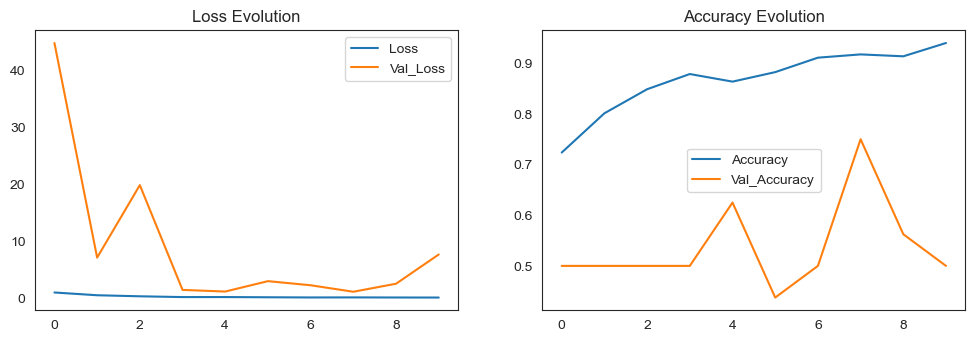

In [37]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [38]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.4248 - loss: 5.6582
Test Accuracy: 69.07%
652/652 ━━━━━━━━━━━━━━━━━━━━ 179s 274ms/step - accuracy: 0.8771 - loss: 0.7765
Train Accuracy: 87.71%


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

624/624 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step
[[ 39 195]
 [  2 388]]


,0,1,accuracy,macro avg,weighted avg
precision,0.951220,0.665523,0.684295,0.808371,0.772659
recall,0.166667,0.994872,0.684295,0.580769,0.684295
f1-score,0.283636,0.797533,0.684295,0.540585,0.604822
support,234.000000,390.000000,0.684295,624.000000,624.000000


In [40]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[ 61 173]
 [  2 388]]


,0,1,accuracy,macro avg,weighted avg
precision,0.968254,0.691622,0.719551,0.829938,0.795359
recall,0.260684,0.994872,0.719551,0.627778,0.719551
f1-score,0.410774,0.815983,0.719551,0.613379,0.664030
support,234.000000,390.000000,0.719551,624.000000,624.000000
